In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



# Load the dataset

In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df

,User ID,Age,Gender,Country,Purchase Amount,Purchase Date,Product Category
0,1,56.0,Female,USA,331.79,2021-11-21,Sports
1,2,69.0,Male,Australia,335.72,2022-03-05,Home & Kitchen
2,3,46.0,NaN,Germany,493.18,NaN,Books
3,4,32.0,Male,Germany,80.97,2023-06-08,Sports
4,5,60.0,Female,UK,21.75,NaN,Beauty
...,...,...,...,...,...,...,...
14995,14996,21.0,Male,UK,427.07,2023-08-20,Clothing
14996,14997,53.0,Other,UK,27.73,2021-07-23,Home & Kitchen
14997,14998,65.0,Female,Canada,108.57,2022-02-21,Beauty
14998,14999,34.0,Other,USA,105.57,2022-08-25,Books


# Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User ID           15000 non-null  int64  
 1   Age               13500 non-null  float64
 2   Gender            14250 non-null  object 
 3   Country           13800 non-null  object 
 4   Purchase Amount   13200 non-null  float64
 5   Purchase Date     13950 non-null  object 
 6   Product Category  14100 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 820.4+ KB


# Checking for Null vlaues

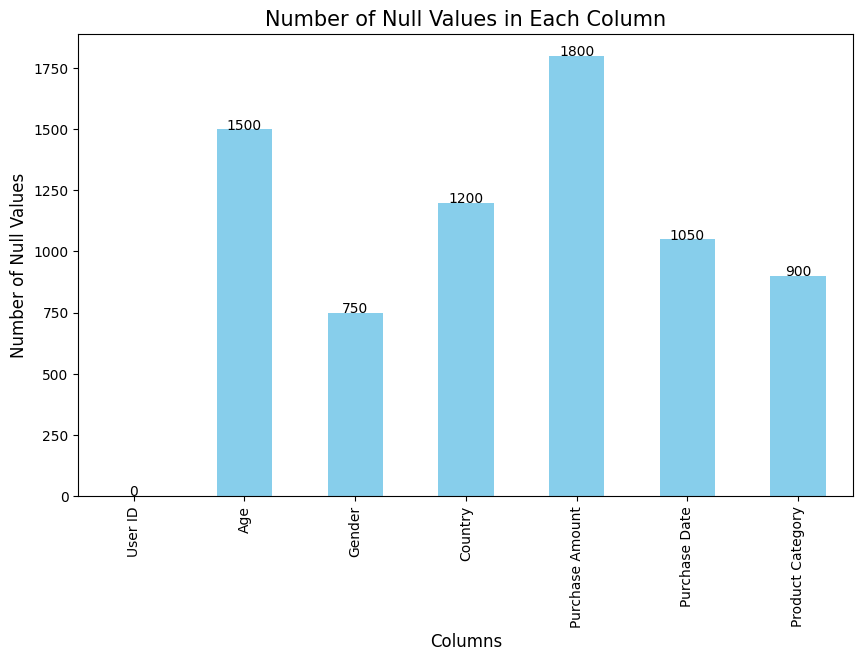

In [ ]:

# Checking for null values in each column
null_counts = df.isnull().sum()

# Plotting the number of null values in each column
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Null Values', fontsize=12)
plt.title('Number of Null Values in Each Column', fontsize=15)

# Adding value labels on top of the bars
for index, value in enumerate(null_counts):
    plt.text(index, value + 0.1, str(value), ha='center', fontsize=10)

# Display the plot
plt.show()

# Removing rows with null values


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9076 entries, 0 to 14998
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User ID           9076 non-null   int64  
 1   Age               9076 non-null   float64
 2   Gender            9076 non-null   object 
 3   Country           9076 non-null   object 
 4   Purchase Amount   9076 non-null   float64
 5   Purchase Date     9076 non-null   object 
 6   Product Category  9076 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 567.2+ KB


# Descriptive **Statistics**

In [ ]:
# Descriptive Statistics
def generate_statistics(data):
    """
    Generates descriptive statistics for the dataset.

    Parameters:
    - data (pd.DataFrame): Input dataframe.

    Returns:
    None
    """
    # Describe the dataset
    description = data.describe()
    print("Descriptive Statistics:\n", description)


    return description

# Generate statistics
description = generate_statistics(df)


Descriptive Statistics:
             User ID          Age  Purchase Amount
count   9076.000000  9076.000000      9076.000000
mean    7501.995152    43.432129       252.442770
std     4328.293768    14.993351       144.011868
min        1.000000    18.000000         5.050000
25%     3736.750000    30.000000       127.715000
50%     7506.000000    43.000000       252.690000
75%    11214.250000    56.000000       379.505000
max    14999.000000    69.000000       499.950000


# Correlation Analysis

<ipython-input-8-260dcdf0da26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en[column] = label_encoder.fit_transform(df_en[column])
<ipython-input-8-260dcdf0da26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en[column] = label_encoder.fit_transform(df_en[column])


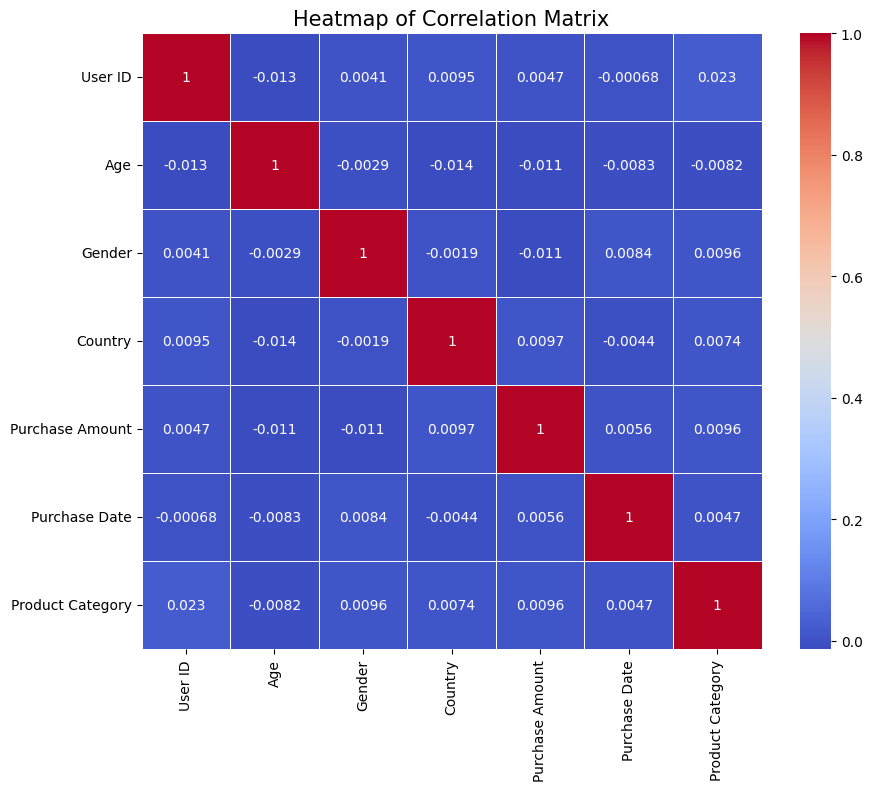

In [ ]:
# Label encode object data type columns
df_en = df
label_encoder = LabelEncoder()
for column in df_en.select_dtypes(include=['object']).columns:
    df_en[column] = label_encoder.fit_transform(df_en[column])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_en.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix', fontsize=15)
plt.show()


# distribution analysis of all numerical columns

In [ ]:
df = pd.read_csv('/content/dataset.csv')
df = df.dropna()

In [ ]:
def plot_distribution_subplots(df, cols_per_row=3, figsize=(15, 10)):
    """
    Plots the distribution analysis of all numerical columns in a DataFrame using subplots.

    Parameters:
    df (pd.DataFrame): The DataFrame for which to create the distribution plots.
    cols_per_row (int): Number of columns per row in the subplots.
    figsize (tuple): Size of the entire figure.
    """
    # Filter numerical columns
    numerical_cols = df.select_dtypes(include=['int', 'float']).columns
    n_cols = len(numerical_cols)

    # Determine the number of rows required
    n_rows = (n_cols // cols_per_row) + (n_cols % cols_per_row > 0)

    # Create a figure and axes for subplots
    fig, axes = plt.subplots(n_rows, cols_per_row, figsize=figsize)
    axes = axes.flatten() if n_cols > 1 else [axes]

    for i, col in enumerate(numerical_cols):
        sns.histplot(df[col], kde=True, ax=axes[i], color='blue')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

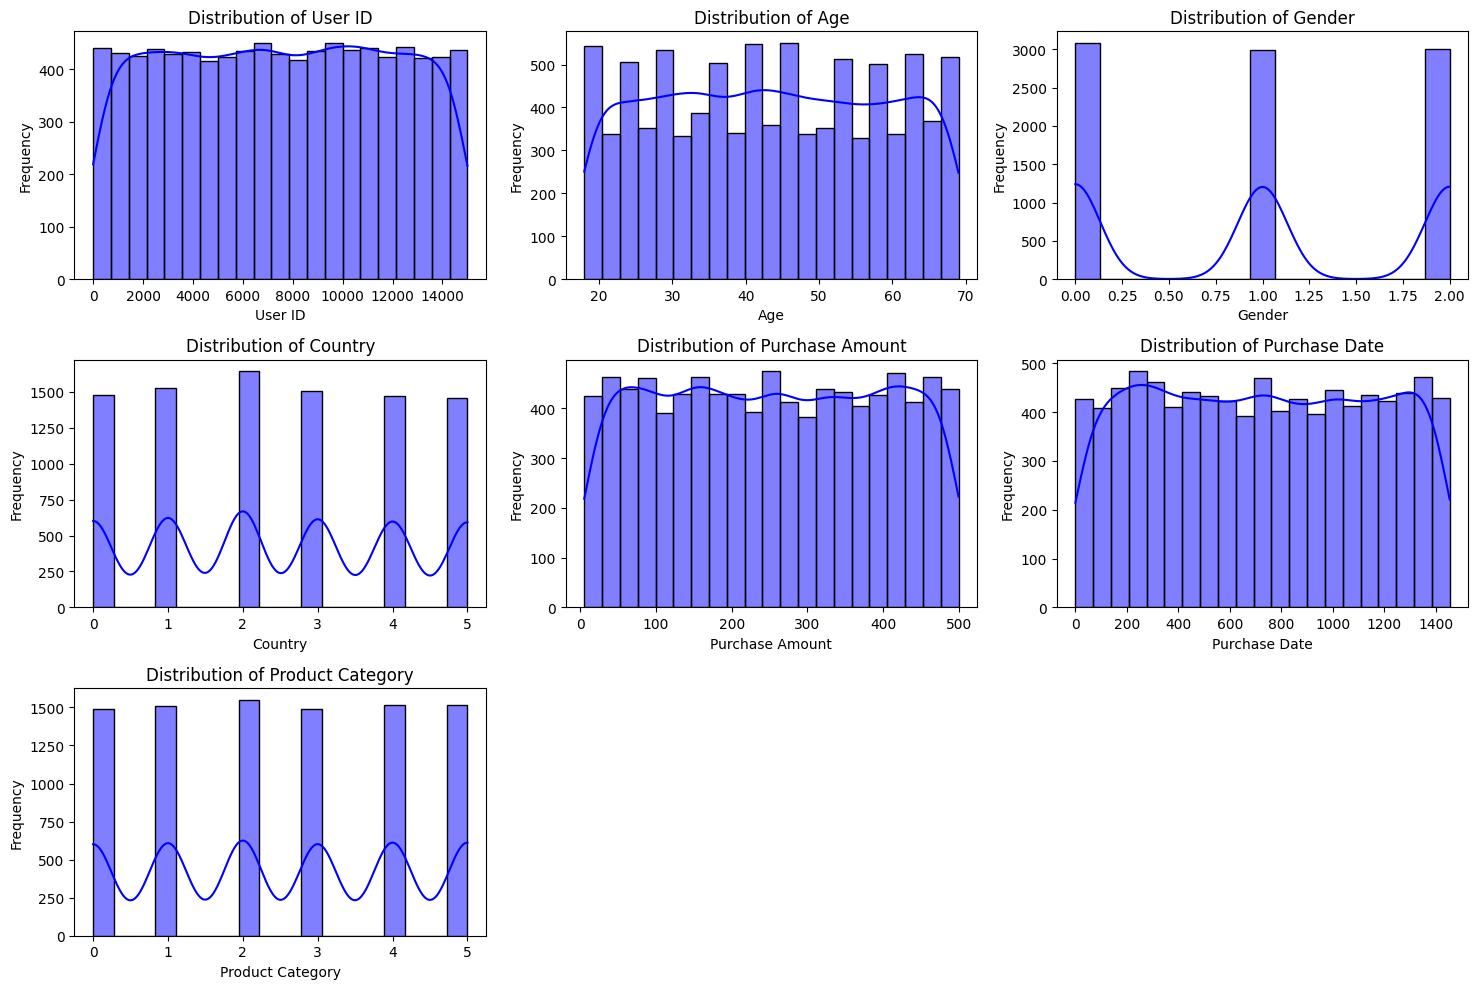

In [ ]:
plot_distribution_subplots(df_en)


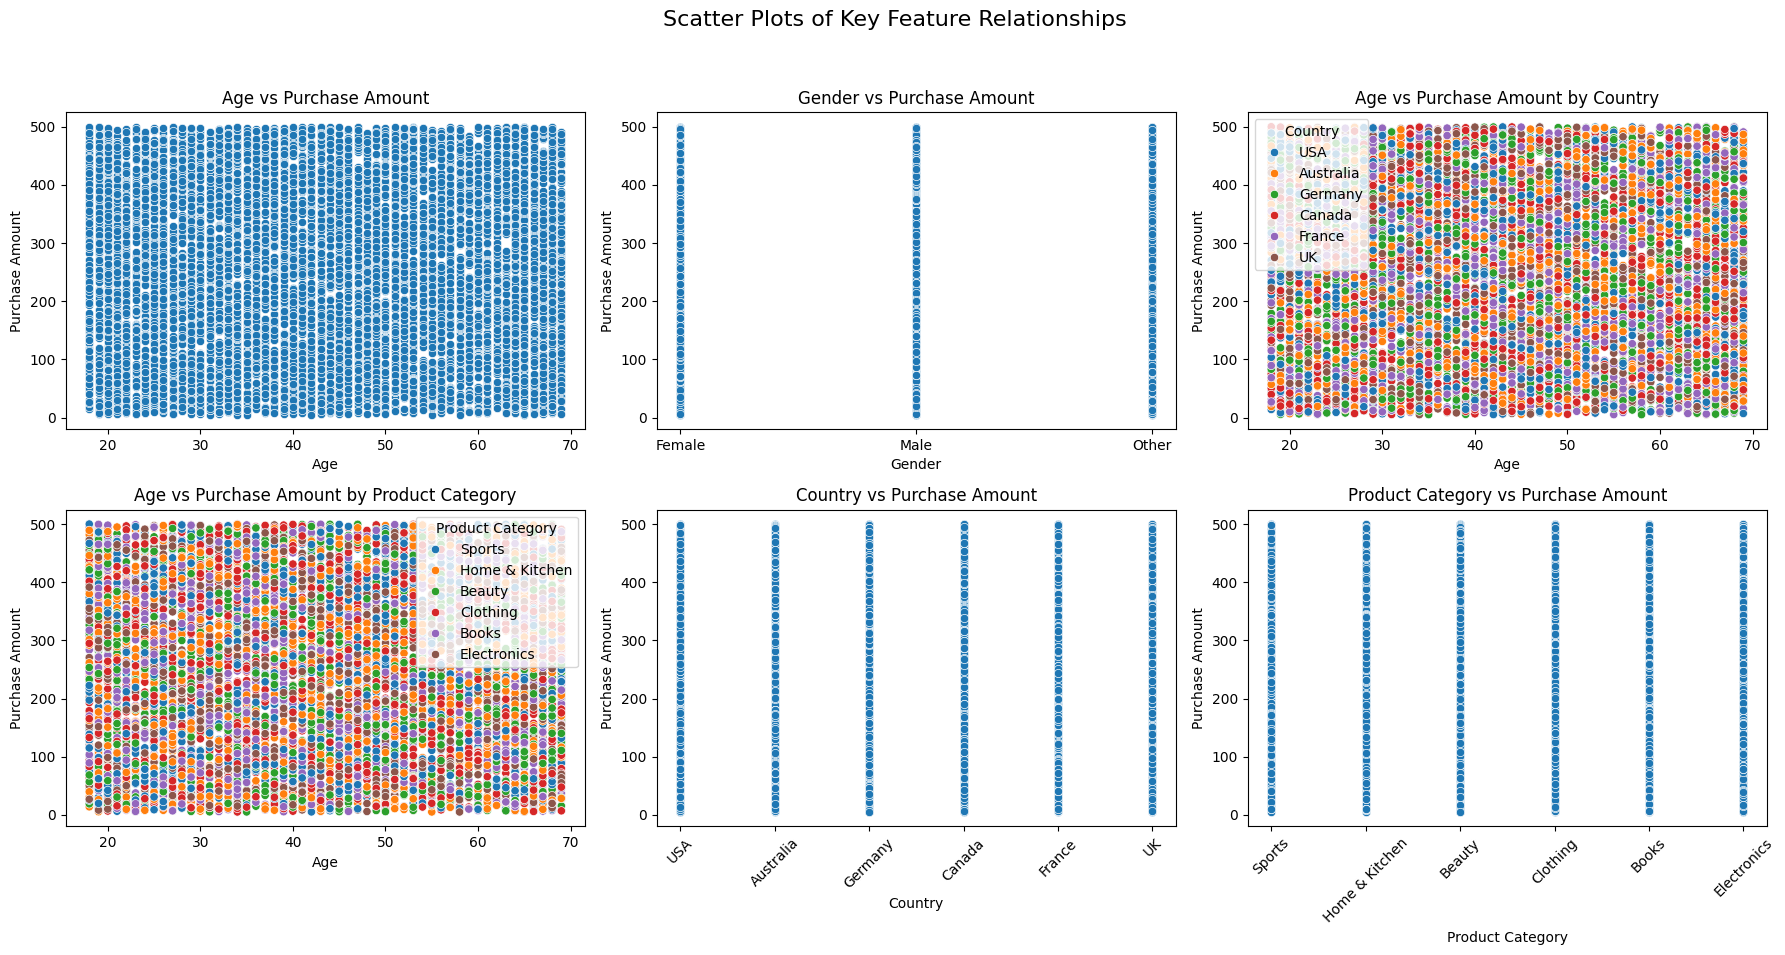

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_feature_relationships(df):
    """
    This function takes a dataframe and plots scatter plots to analyze the relationships between key features.
    It plots the six key feature relationships in subplots for easy visualization and comparison.

    Parameters:
    df (pd.DataFrame): The input dataframe containing features 'Age', 'Purchase Amount', 'Gender', 'Country', 'Product Category'.

    Returns:
    None
    """
    # Setting up the plot
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Scatter Plots of Key Feature Relationships', fontsize=16)

    # Scatter plot 1: Age vs Purchase Amount
    sns.scatterplot(ax=axes[0, 0], x='Age', y='Purchase Amount', data=df)
    axes[0, 0].set_title('Age vs Purchase Amount')

    # Scatter plot 2: Purchase Amount by Gender
    sns.scatterplot(ax=axes[0, 1], x='Gender', y='Purchase Amount', data=df)
    axes[0, 1].set_title('Gender vs Purchase Amount')

    # Scatter plot 3: Age vs Purchase Amount by Country
    sns.scatterplot(ax=axes[0, 2], x='Age', y='Purchase Amount', hue='Country', data=df)
    axes[0, 2].set_title('Age vs Purchase Amount by Country')

    # Scatter plot 4: Age vs Purchase Amount by Product Category
    sns.scatterplot(ax=axes[1, 0], x='Age', y='Purchase Amount', hue='Product Category', data=df)
    axes[1, 0].set_title('Age vs Purchase Amount by Product Category')

    # Scatter plot 5: Purchase Amount by Country
    sns.scatterplot(ax=axes[1, 1], x='Country', y='Purchase Amount', data=df)
    axes[1, 1].set_title('Country vs Purchase Amount')
    axes[1, 1].tick_params(axis='x', rotation=45)

    # Scatter plot 6: Purchase Amount by Product Category
    sns.scatterplot(ax=axes[1, 2], x='Product Category', y='Purchase Amount', data=df)
    axes[1, 2].set_title('Product Category vs Purchase Amount')
    axes[1, 2].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Assuming df is already loaded with the given columns
# df = pd.read_csv("data.csv")
plot_feature_relationships(df)